#### Load Packages

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import numpy as np

#### Shorten SentimentIntensityAnalyzer Function

In [16]:
vader = SentimentIntensityAnalyzer()

#### Read the 'text' column in the .csv file of 181,000 tweets and turn it into a dataframe using 'Pandas' package

In [17]:
df = pd.read_csv("trump100days.csv", usecols=['text'])

#### Create labels for different sentiment values and start the count for each value at zero

In [18]:
res = {"laude":0, "positive":0, "neutral":0, "negative":0, "hateful":0}

#### Go through and apply the Vader sentiment analyzer to all 181k+ tweets and count them

In [19]:
for index, row in df.iterrows():
    vs = vader.polarity_scores(df['text'][index])
    if vs["compound"]==0.0:
        res["neutral"] +=1
    elif 0.00001 < vs["compound"] < 0.49999:
        res["positive"] +=1
    elif vs["compound"] >= 0.5:
        res["laude"] +=1
    elif -0.49999 < vs["compound"] < -0.00001:
        res["negative"] +=1
    else:
        res["hateful"] +=1
        
print(res)


{'laude': 19154, 'positive': 34128, 'neutral': 57363, 'negative': 36611, 'hateful': 34547}


#### Plot the results in a bar graph

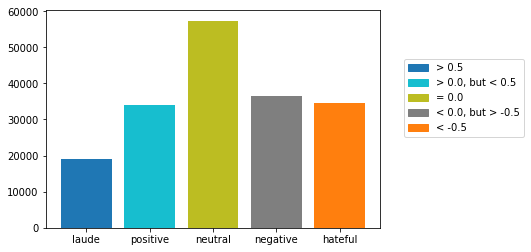

In [20]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


plt.bar(range(len(res)), res.values(), align='center', color = ['C0','C9','C8','C7','C1'])
plt.xticks(range(len(res)), res.keys())

LA = mpatches.Patch(color='C0', label = '> 0.5')
PO = mpatches.Patch(color='C9',label = '> 0.0, but < 0.5')
NT = mpatches.Patch(color='C8',label = '= 0.0')
NE = mpatches.Patch(color='C7',label = '< 0.0, but > -0.5')
HA = mpatches.Patch(color='C1',label = '< -0.5')
plt.legend(handles=[LA,PO,NT,NE,HA], loc='upper center', bbox_to_anchor=(1.25, 0.8))

plt.show()
